/var/folders/7c/8mtjd32n5x7btdj2njkzbsbm0000gn/T/ipykernel_14209/1072090697.py:31: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/7c/8mtjd32n5x7btdj2njkzbsbm0000gn/T/ipykernel_14209/1072090697.py:44: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/Users/admin/anaconda3/lib/python3.10/site-packages/geopandas/plotting.py:489: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.draw()
/var/folders/7c/8mtjd32n5x7btdj2njkzbsbm0000gn/T/ipykernel_14209/1072090697.py:58: Mat

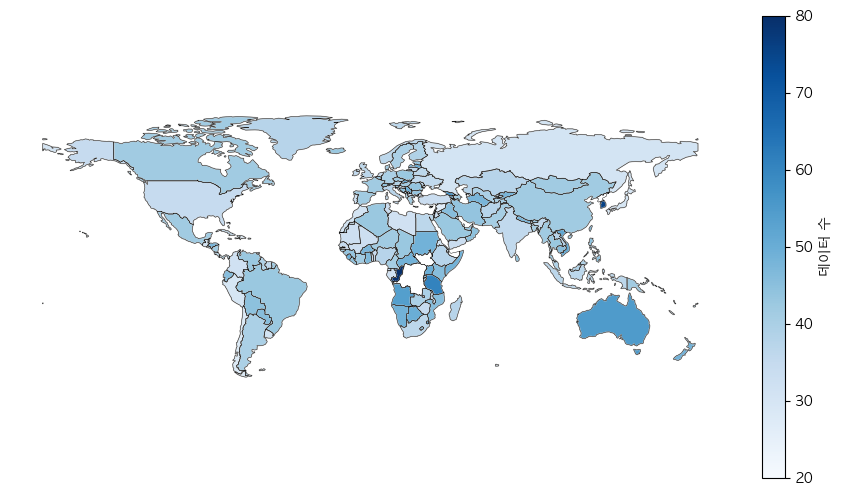

In [25]:
# 각 나라별 데이터 컬러 맵 #
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import geopandas as gpd
import pycountry
from pprint import PrettyPrinter
from datetime import datetime
vmin = 20               #최소값
vmax = 80               #최대값

ext_iso_dict = {        #매치 되치 않은 ios a3 리스트 생성
    'Bolivia': 'BOL',
    "Cote d'Ivoire": 'CIV',
    'Czech Republic': 'CZE',
    'Iran': 'IRN',
    'Korea': 'KOR',
    'Kyrgyz Republic': 'KGZ',
    'Libyan Arab Jamahiriya': 'LBY',
    'Moldova': 'MDA',
    'Palestinian Territory': 'PSE',
    'Slovakia (Slovak Republic)': 'SVK',
    'Swaziland': 'SWZ',
    'Taiwan': 'TWN',
    'Tanzania': 'TZA',
    'United States of America': 'USA',
    'Venezuela': 'VEN',
    'Vietnam': 'VNM'
}
pp = PrettyPrinter(width = 150, compact = True)
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

def get_iso_a3(country_name):
    country = pycountry.countries.get(name = country_name)
    if country:
        country = pycountry.countries.get(name = country_name)
        return country.alpha_3
    else:
        return ext_iso_dict.get(country_name, None)

climate_filepath = "./climate_change_data.csv"
df = pd.read_csv(climate_filepath)
df['Date'] = pd.to_datetime(df['Date'])
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_map = world_map[(world_map['continent'] != 'Antarctica')]     #남극 제외

df = df.groupby('Country')['Country'].count()


df.index = df.index.map(get_iso_a3)
df = df.reset_index(name='Number')
df.columns = ['iso_a3', 'Number']

merged = world_map.merge(df, left_on='iso_a3', right_on='iso_a3', how='left')
fig, ax = plt.subplots(figsize=(10, 6))
world_map.boundary.plot(ax=ax, color='black', linewidth=0.3)

cmap = plt.cm.get_cmap('Blues')
cmap.set_under(color='white')
merged.plot(column='Number', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False, vmin = vmin, vmax = vmax)

ax.axis('off')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax = vmax))
sm.set_array([])
cbar = plt.colorbar(sm, label='데이터 수', fraction = 0.03, pad = 0.04)
cbar.solids.set_edgecolor("face")

plt.show()

/var/folders/7c/8mtjd32n5x7btdj2njkzbsbm0000gn/T/ipykernel_14209/1036318873.py:30: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/7c/8mtjd32n5x7btdj2njkzbsbm0000gn/T/ipykernel_14209/1036318873.py:43: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/7c/8mtjd32n5x7btdj2njkzbsbm0000gn/T/ipykernel_14209/1036318873.py:88: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]

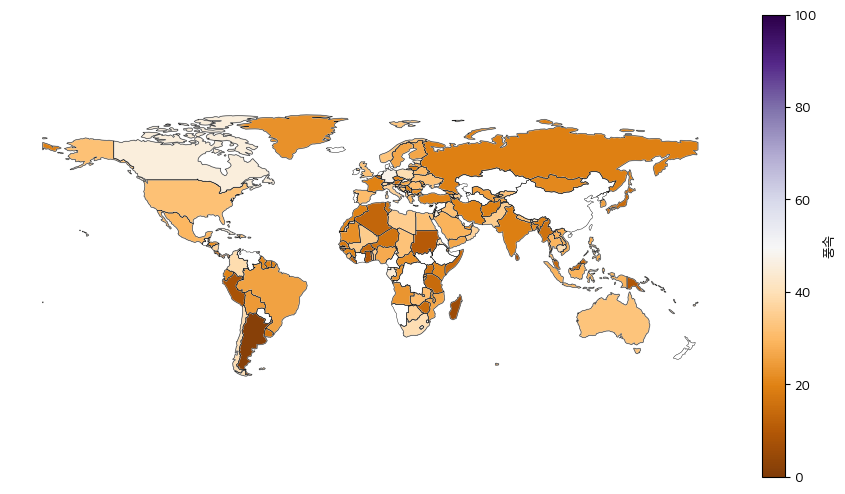

In [34]:
# 각 나라별 기후 데이터 컬러 맵 #
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import geopandas as gpd
import pycountry
from pprint import PrettyPrinter
from datetime import datetime
plt.rcParams['font.family'] = 'Apple SD Gothic Neo'

ext_iso_dict = {        #매치 되치 않은 ios a3 리스트 생성
    'Bolivia': 'BOL',
    "Cote d'Ivoire": 'CIV',
    'Czech Republic': 'CZE',
    'Iran': 'IRN',
    'Korea': 'KOR',
    'Kyrgyz Republic': 'KGZ',
    'Libyan Arab Jamahiriya': 'LBY',
    'Moldova': 'MDA',
    'Palestinian Territory': 'PSE',
    'Slovakia (Slovak Republic)': 'SVK',
    'Swaziland': 'SWZ',
    'Taiwan': 'TWN',
    'Tanzania': 'TZA',
    'United States of America': 'USA',
    'Venezuela': 'VEN',
    'Vietnam': 'VNM'
}
pp = PrettyPrinter(width = 150, compact = True)
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

def get_iso_a3(country_name):
    country = pycountry.countries.get(name = country_name)
    if country:
        country = pycountry.countries.get(name = country_name)
        return country.alpha_3
    else:
        return ext_iso_dict.get(country_name, None)

climate_filepath = "./climate_change_data.csv"
df = pd.read_csv(climate_filepath)
df['Date'] = pd.to_datetime(df['Date'])
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_map = world_map[(world_map['continent'] != 'Antarctica')]         #남극 제외

while True:
    option = int(input("1. 온도 2. C02 배출량 3. 해수면 상승 4. 강수량 5. 습도 6. 풍속"))
    if option == 1:
        SELECT = 'Temperature'
        COLUMNN = '온도'
        vmin = 0
        vmax = 30
        cmap = plt.cm.get_cmap('coolwarm')
        break
    elif option == 2:
        SELECT = 'CO2 Emissions'
        COLUMNN = 'C02 배출량'
        vmin = 300
        vmax = 500
        cmap = plt.cm.get_cmap('Greens')
        break
    elif option == 3:
        SELECT = 'Sea Level Rise'
        COLUMNN = '해수면 상승'
        vmin = -5
        vmax = 10
        cmap = plt.cm.get_cmap('YlOrBr')
        break
    elif option == 4:
        SELECT = 'Precipitation'
        COLUMNN = '강수량'
        vmin = 0
        vmax = 100
        cmap = plt.cm.get_cmap('Blues')
        break
    elif option == 5:
        SELECT = 'Humidity'
        COLUMNN = '습도'
        vmin = 0
        vmax = 100
        cmap = plt.cm.get_cmap('YlGnBu')
        break
    elif option == 6:
        SELECT = 'Wind Speed'
        COLUMNN = '풍속'
        vmin = 0
        vmax = 100
        cmap = plt.cm.get_cmap('PuOr')
        break
    else:
        print("선택지가 잘못되었습니다.")

while True:     
    START_DATE = input("시작 날짜(2000-01-01 ~ 2022-12-31 예: 2000-01-01): ")
    END_DATE = input("마지막 날짜(2000-01-01 ~ 2022-12-31 예: 2020-01-01): ")

    try:
        START_DATE = datetime.strptime(START_DATE, "%Y-%M-%d")
        END_DATE = datetime.strptime(END_DATE, "%Y-%M-%d")
        break
    except ValueError:
        print("날짜가 잘못되었습니다.")

df = df[(df['Date'] >= pd.Timestamp(START_DATE)) & (df['Date'] <= pd.Timestamp(END_DATE))]

df = df.groupby('Country')[SELECT].mean()

df.index = df.index.map(get_iso_a3)
df = df.reset_index()
df.columns = ['iso_a3', SELECT]

merged = world_map.merge(df, left_on='iso_a3', right_on='iso_a3', how='left')
fig, ax = plt.subplots(figsize=(10, 6))
world_map.boundary.plot(ax=ax, color='black', linewidth=0.3)

cmap.set_under(color='white')
merged.plot(column=SELECT, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False, vmin = vmin, vmax = vmax)

ax.axis('off')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax = vmax))
sm.set_array([])
cbar = plt.colorbar(sm, label=COLUMNN, fraction = 0.03, pad = 0.04)
cbar.solids.set_edgecolor("face")

plt.show()

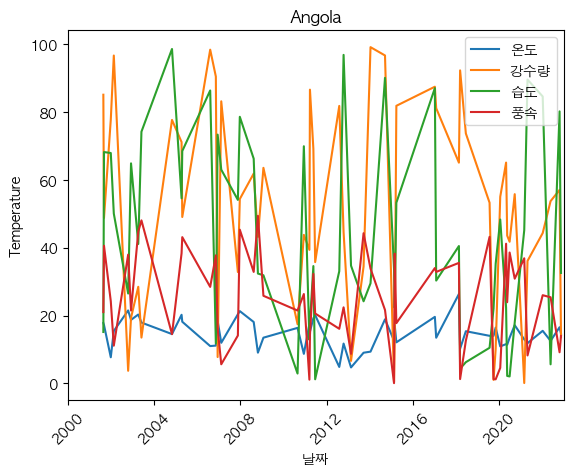

<Figure size 640x480 with 0 Axes>

In [39]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import PrettyPrinter
from datetime import datetime
plt.rcParams['font.family'] = 'AppleGothic'
pp = PrettyPrinter(width = 150, compact = True)

climate_filepath = "./climate_change_data.csv"
df = pd.read_csv(climate_filepath)

df['Date'] = pd.to_datetime(df['Date'])

while True:
    COUNTRY = input("국가(0: 국가 리스트): ")
    if COUNTRY == '0':
        pp.pprint(sorted(set(df['Country'])))
    elif COUNTRY in set(df['Country']):
        break
    else:
        print("해당 국가는 존재하지 않습니다.")

while True:     
    START_DATE = input("Start Date(2000-01-01 ~ 2022-12-31 Ex: 2000-01-01): ")
    END_DATE = input("End Date(2000-01-01 ~ 2022-12-31 Ex: 2020-01-01): ")

    try:
        START_DATE = datetime.strptime(START_DATE, "%Y-%m-%d")
        END_DATE = datetime.strptime(END_DATE, "%Y-%m-%d")
        break
    except ValueError:
        print("날짜가 잘못되었습니다.")

df = df.loc[df.Country == COUNTRY]
df = df[(df['Date'] >= pd.Timestamp(START_DATE)) & (df['Date'] <= pd.Timestamp(END_DATE))]


ax = sns.lineplot(data = df, x = 'Date', y = 'Temperature', label = '온도')
ax = sns.lineplot(data = df, x = 'Date', y = 'Precipitation', label = '강수량', ax = ax)
ax = sns.lineplot(data = df, x = 'Date', y = 'Humidity', label = '습도', ax = ax)
ax = sns.lineplot(data = df, x = 'Date', y = 'Wind Speed', label = '풍속', ax = ax)

ax.set_title(COUNTRY)
plt.xlim([START_DATE, END_DATE])
plt.xticks(rotation = 45)
plt.yticks([])
plt.xlabel('날짜')
plt.show()
plt.tight_layout()


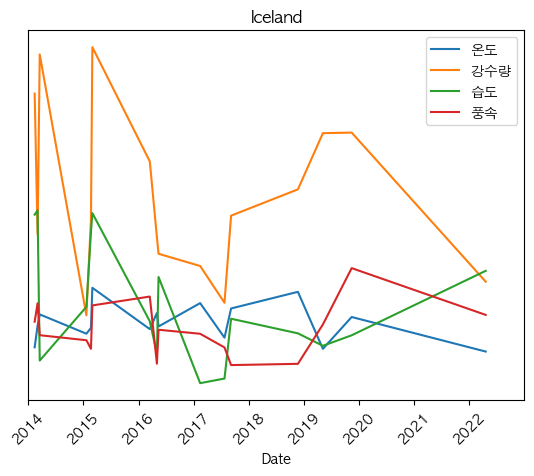

<Figure size 640x480 with 0 Axes>

In [13]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import PrettyPrinter
from datetime import datetime
plt.rcParams['font.family'] = 'AppleGothic'
pp = PrettyPrinter(width = 150, compact = True)

def calc_fluctuation(data):
    if data.iloc[0] != 0:
        return (data - data.iloc[0]) / data.iloc[0] * 100
    else:
        return data

climate_filepath = "./climate_change_data.csv"
df = pd.read_csv(climate_filepath)

df['Date'] = pd.to_datetime(df['Date'])
df[['Temperature', 'CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']] = \
    df[['Temperature', 'CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']].apply(calc_fluctuation)

while True:
    COUNTRY = input("Country(0: Country List): ")
    if COUNTRY == '0':
        pp.pprint(sorted(set(df['Country'])))
    elif COUNTRY in set(df['Country']):
        break
    else:
        print("No Country! Check Please")

while True:     
    START_DATE = input("Start Date(2000-01-01 ~ 2022-12-31 Ex: 2000-01-01): ")
    END_DATE = input("End Date(2000-01-01 ~ 2022-12-31 Ex: 2020-01-01): ")

    try:
        START_DATE = datetime.strptime(START_DATE, "%Y-%m-%d")
        END_DATE = datetime.strptime(END_DATE, "%Y-%m-%d")
        break
    except ValueError:
        print("Date Error! Check Please")

df = df.loc[df.Country == COUNTRY]
df = df[(df['Date'] >= pd.Timestamp(START_DATE)) & (df['Date'] <= pd.Timestamp(END_DATE))]


ax = sns.lineplot(data = df, x = 'Date', y = 'Temperature', label = '온도')
#sns.lineplot(data = df, x = 'Date', y = 'CO2 Emissions', label = 'CO2 배출량', ax = ax)
#sns.lineplot(data = df, x = 'Date', y = 'Sea Level Rise', label = '해수면 상승', ax = ax)
sns.lineplot(data = df, x = 'Date', y = 'Precipitation', label = '강수량', ax = ax)
sns.lineplot(data = df, x = 'Date', y = 'Humidity', label = '습도', ax = ax)
sns.lineplot(data = df, x = 'Date', y = 'Wind Speed', label = '풍속', ax = ax)

ax.set_title(COUNTRY)
plt.xlim([START_DATE, END_DATE])
plt.xticks(rotation = 45)
plt.yticks([])
plt.ylabel('')
plt.show()
plt.tight_layout()
